Importation of packages

In [1]:
import filter_data  # class containing filter methods 
import date_handling  # ￼class containing date related methods
import tweet_analysis  # class containing the method for the content analysis of the tweets. 
import constants  # import global constants
import plot # plotting functions 
import dictionnaries # defined dictionaries
import numpy as np # numpy for array handling
import percentage # compute percentage

# Reload each module
import importlib

importlib.reload(filter_data)
importlib.reload(date_handling)
importlib.reload(tweet_analysis)
importlib.reload(constants)
importlib.reload(plot)
importlib.reload(dictionnaries)



<module 'dictionnaries' from '/home/loris/Desktop/populist_russians_bots/dictionnaries.py'>

Definition of constants 


In [2]:
START_DATE = np.datetime64('2014-07-01') # Date of the first published tweet in English 
END_DATE = np.datetime64('2018-06-01') # Date of the last published tweet in English 


Filter the data : 
- Keep only tweets written in english 
- Remove links in the tweets
- Remove columns that we do not need 
- Reformat dates

In [ ]:
# Warning: This cell needs to be run only once. 

# Define the set of column indices to keep
COLUMN_INDICES = {1, 2, 5, 13}

# Call the function with the input file name and column indices
for i in range(1, 14): 
    input_path= constants.RAW_DATA_PATH.format(i)
    output_path= constants.PRE_PROCESSED_DATA_PATH.format(i)
    filter_data.filter_csv(input_path, output_path, COLUMN_INDICES, 4, "English") # Keep only tweets in english 
    filter_data.extract_date_columns(output_path, output_path)
    filter_data.remove_links(output_path, output_path)
    filter_data.convert_to_lowercase(output_path, output_path)

Get the array of dates that span the period of the tweets

In [3]:
date_array = date_handling.get_date_array(START_DATE, END_DATE)

(Optional) Plot the number of tweets over the period

In [4]:
nb_of_tweets_per_day = tweet_analysis.get_nb_of_tweets_per_day(date_array)
print(nb_of_tweets_per_day.sum(axis=0))


2025222.0


In [15]:
%matplotlib qt

plot.plot_result(date_array, nb_of_tweets_per_day, START_DATE, END_DATE)

Dictionary analysis


In [ ]:
nb_of_tweets_filtered_with_dic = tweet_analysis.dataset_analysis(dictionnaries.dic_rooduijn_pauwels, date_array)


Plot result of dictionary analysis

In [ ]:
plot.plot_result(date_array,nb_of_tweets_filtered_with_dic, START_DATE, END_DATE)

Get percentage of tweets with at least one words over the total nb of tweets

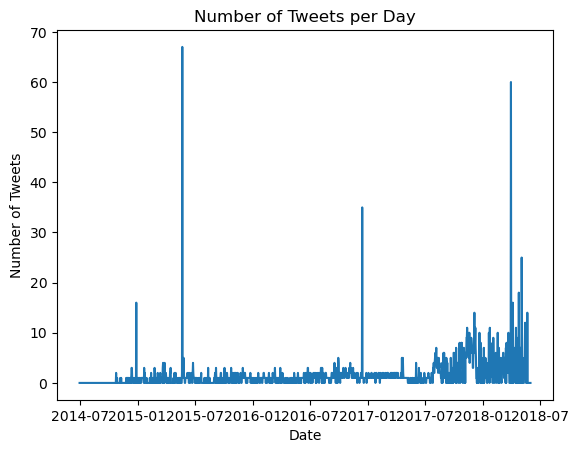

In [51]:
percentage = percentage.percentage_of_tweets(nb_of_tweets_filtered_with_dic, nb_of_tweets_per_day)
plot.plot_result(date_array, percentage, START_DATE, END_DATE)